# Computer Assignment 5 Phase 2

**In this assignment we are about to classify images from 4 different classes using Nueral Networks.We will use TensorFlow library and Keras interface to train our model.**

## Data Review and PreProcess
First we mount our Goole Drive as our storage. Then unzip the dataset so we can use our pictures.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp '/content/drive/MyDrive/dataset.zip' .
!unzip dataset.zip

In [5]:
TRAIN_DIR = '/content/dataset/train'
TEST_DIR = '/content/dataset/test'

In this step we read our data with given format like grayscalling, normalizing, batch size, and etc.

As mentioned, we split train data into train and vlidation with 0.3 ratio. Number of images in train, validation, and test is printed below.

In [6]:
from tensorflow import keras
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_data = data_generator.flow_from_directory(TRAIN_DIR, color_mode='grayscale', batch_size = 32, subset='training', target_size=(100,100), shuffle=False)
validation_data = data_generator.flow_from_directory(TRAIN_DIR, color_mode='grayscale', batch_size = 32, subset='validation', target_size=(100,100), shuffle=False)
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = data_generator.flow_from_directory(TEST_DIR, color_mode='grayscale', batch_size = 32, target_size=(100,100), shuffle=False)

Found 1363 images belonging to 4 classes.
Found 582 images belonging to 4 classes.
Found 833 images belonging to 4 classes.


Found 1945 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


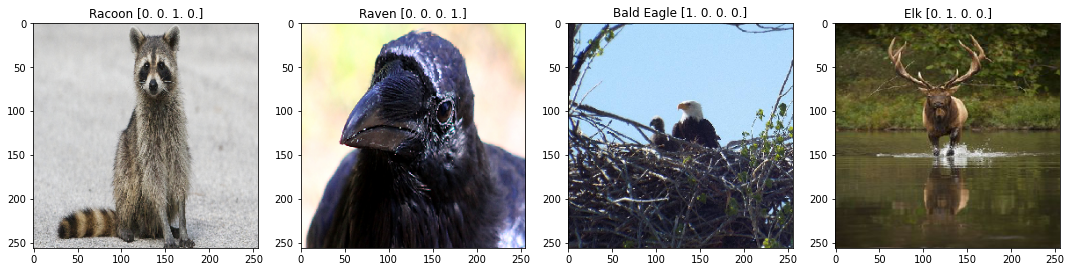

In [7]:
from matplotlib import pyplot as plot

pd = data_generator.flow_from_directory(TRAIN_DIR, batch_size = 32)
images, labels = pd.next()

plot.figure(figsize=(15,4))
im_label = {0:'Bald Eagle', 1:'Elk', 2:'Racoon', 3:'Raven'}
i = 1
for image, label in zip(images, labels):
  if label.argmax() in im_label:
    plot.subplot(1,4,i)
    plot.imshow(keras.preprocessing.image.array_to_img(image), cmap='gray')
    plot.title(im_label[label.argmax()] + ' '  + str(label))
    del im_label[label.argmax()]
    i += 1

plot.tight_layout()
plot.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


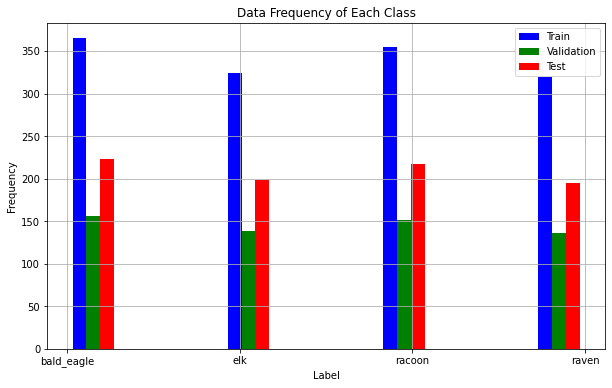

In [8]:
plot.figure(figsize=(10,6))
labels = (train_data.classes, validation_data.classes, test_data.classes)
plot.hist(labels, label=['Train', 'Validation', 'Test'], color=['b', 'g', 'r'])
plot.xlabel('Label')
plot.ylabel('Frequency')
plot.title('Data Frequency of Each Class')
loc = list(train_data.class_indices.values())
my_xticks = list(train_data.class_indices.keys())
plot.xticks(loc, my_xticks)
plot.legend()
plot.grid()
plot.show()

## Design Nueral Network
In this section we design a nueral network with given parameters. After designing the network we try to fit our model into designed network.

First we print our model summary and then start fitting process. In fitting process and after each epoch we print accuracy and loss for train and test data. At the end we print recall, precision, and F1 indicators and plot accuracy and loss per epoch.

Parameters for each layer can be calculated as $Params = Number of inputs \times (Number of Neurons + 1)$ and the total params would be the accumulation of each layer params.

In [9]:
input_data = keras.layers.Input(shape=(100,100,1))

output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

main_model = keras.models.Model(inputs=input_data, outputs=output)
main_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
main_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 5000)              50005000  
                                                                 
 dense_1 (Dense)             (None, 2500)              12502500  
                                                                 
 dense_2 (Dense)             (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________


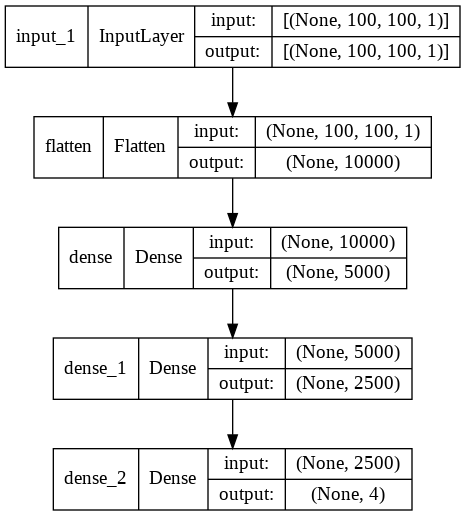

In [11]:
keras.utils.plot_model(main_model, show_shapes=True, expand_nested=True)

In [12]:
main_history = main_model.fit(train_data, validation_data=validation_data, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 67s 2s/step - loss: 2.1200 - accuracy: 0.1893 - val_loss: 1.3152 - val_accuracy: 0.3935
Epoch 2/10
43/43 [==============================] - 66s 2s/step - loss: 1.3698 - accuracy: 0.3015 - val_loss: 1.3732 - val_accuracy: 0.3488
Epoch 3/10
43/43 [==============================] - 63s 1s/step - loss: 1.3312 - accuracy: 0.4065 - val_loss: 1.2357 - val_accuracy: 0.3780
Epoch 4/10
43/43 [==============================] - 66s 2s/step - loss: 1.2525 - accuracy: 0.4563 - val_loss: 1.3031 - val_accuracy: 0.3660
Epoch 5/10
43/43 [==============================] - 64s 2s/step - loss: 1.2495 - accuracy: 0.4710 - val_loss: 1.1872 - val_accuracy: 0.4553
Epoch 6/10
43/43 [==============================] - 64s 1s/step - loss: 1.2121 - accuracy: 0.4490 - val_loss: 1.1890 - val_accuracy: 0.5103
Epoch 7/10
43/43 [==============================] - 63s 1s/step - loss: 1.1893 - accuracy: 0.4813 - val_loss: 1.1295 - val_accuracy: 0.5704
Epoch 8/10
43/43 [=============

In [13]:
import numpy
from sklearn.metrics import classification_report 

def model_fit_info(model_, model_history, train, test):

    train_pred = model_.predict(train)
    valid_pred = model_.predict(test)

    print("Train:")
    print(classification_report(numpy.argmax(numpy.array(train_pred), axis = 1), numpy.array(train_data.classes)))
    print("Test:")
    print(classification_report(numpy.argmax(numpy.array(valid_pred), axis = 1), numpy.array(validation_data.classes)))

    plot.figure(figsize=(10,4))

    plot.subplot(1,2,1)
    plot.plot(model_history.history['accuracy'], color = 'c', label='Train')
    plot.plot(model_history.history['val_accuracy'], color = 'm', label='Test')
    plot.title('Model Accuracy')
    plot.ylabel('Accuracy')
    plot.xlabel('Epoch')
    plot.legend()
    plot.grid()

    plot.subplot(1,2,2)
    plot.plot(model_history.history['loss'], color = 'c', label='Train')
    plot.plot(model_history.history['val_loss'], color = 'm', label='Test')
    plot.title('Model Loss')
    plot.ylabel('Loss')
    plot.xlabel('Epoch')
    plot.legend()
    plot.grid()

    plot.tight_layout()
    plot.show()

## Classify Data

### Effect of Activation Function
In this part we tested ReLU, Leaky ReLU, Sigmoid, and Tanh activation functions and as we can see ReLU is having the best result in our accuracy.

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train:
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       577
           1       0.32      0.86      0.47       121
           2       0.28      0.97      0.43       101
           3       0.87      0.49      0.63       564

    accuracy                           0.52      1363
   macro avg       0.53      0.68      0.51      1363
weighted avg       0.68      0.52      0.55      1363

Test:
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       252
           1       0.26      0.82      0.40        44
           2       0.21      0.80      0.33        40
           3       0.84      0.46      0.60       246

    accuracy                           0.47       582
   macro avg       0.48      0.61      0.45       582
weighted avg       0.65      0.47      0.50       582



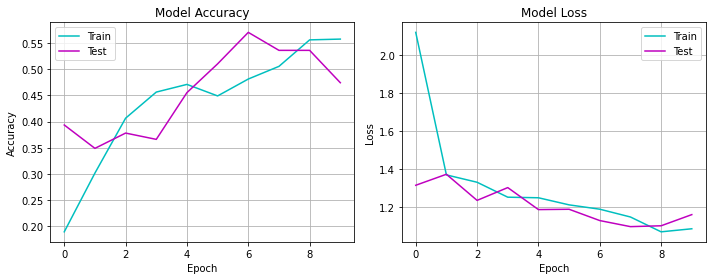

In [14]:
model_fit_info(main_model,main_history, train_data, validation_data)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_4 (Dense)             (None, 2500)              12502500  
                                                                 
 dense_5 (Dense)             (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 66s 2s/step - loss: 2.9289 - accuracy: 0.3338 - val_loss: 1.3525 - val_accuracy: 0.3608
Epoch 2/10
43/43 [==============================] - 64s 2s/step - loss: 1.5714 - accuracy: 0.2355 - val_loss: 1.3559 - val_accuracy: 0.3230
Epoch 3/10
43/43 [==============================] - 64s 1s/step - loss: 1.4744 - accuracy: 0.2715 - val_loss: 1.2339 - val_accuracy: 0.4192
Epoch 4/10
43/43 [==============================] - 64s 1s/step - loss: 1.3053 - accuracy: 0.4175 - val_loss: 1.4106 - val_accuracy: 0.3746
Epoch 5/10
43/43 [==============================] - 64s 1s/step - loss: 1.2967 - accuracy: 0.4211 - val_loss: 1.2155 - val_accuracy: 0.4072
Epoch 6/10
43/43 [==============================] - 64s 1s/step - loss: 1.2645 - accuracy: 0.4343 - val_loss: 1.2104 - val_accuracy: 0.4330
Epoch 7/10
43/43 [==============================] - 64s 1s/step - loss: 1.2584 - accuracy: 0.4072 - val_loss: 1.4553 - val_accuracy: 0.2818
Epoch 8/10
43/43 [=============

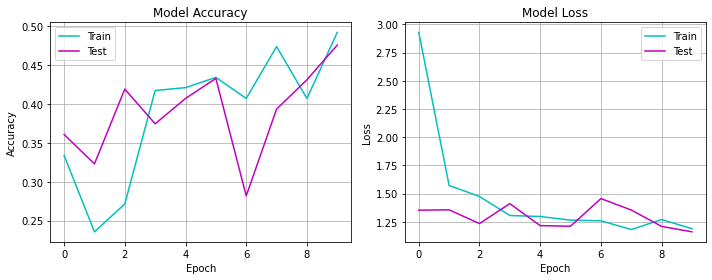

In [15]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='LeakyReLU')(output)
output = keras.layers.Dense(2500, activation='LeakyReLU')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input_data, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(model,history, train_data, validation_data)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_7 (Dense)             (None, 2500)              12502500  
                                                                 
 dense_8 (Dense)             (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
12/43 [=======>.....................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 66s 2s/step - loss: 5.0450 - accuracy: 0.2003 - val_loss: 3.8698 - val_accuracy: 0.2612
Epoch 2/10
43/43 [==============================] - 64s 2s/step - loss: 3.1006 - accuracy: 0.2377 - val_loss: 2.6556 - val_accuracy: 0.2612
Epoch 3/10
43/43 [==============================] - 65s 2s/step - loss: 2.4343 - accuracy: 0.1614 - val_loss: 1.7131 - val_accuracy: 0.2337
Epoch 4/10
43/43 [==============================] - 65s 2s/step - loss: 1.8464 - accuracy: 0.2333 - val_loss: 1.6464 - val_accuracy: 0.2612
Epoch 5/10
43/43 [==============================] - 65s 2s/step - loss: 1.8068 - accuracy: 0.1592 - val_loss: 1.7641 - val_accuracy: 0.2612
Epoch 6/10
43/43 [==============================] - 65s 2s/step - loss: 1.6484 - accuracy: 0.2311 - val_loss: 1.5794 - val_accuracy: 0.2612
Epoch 7/10
43/43 [==============================] - 65s 2s/step - loss: 1.5549 - accuracy: 0.2891 - val_loss: 1.4531 - val_accuracy: 0.2371
Epoch 8/10
43/43 [=============

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

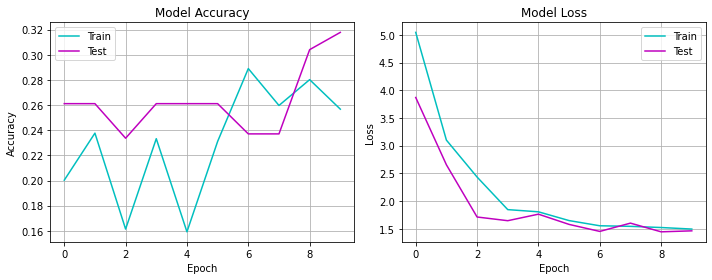

In [16]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='sigmoid')(output)
output = keras.layers.Dense(2500, activation='sigmoid')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input_data, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(model,history, train_data, validation_data)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_9 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_10 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_11 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
17/43 [==========>..................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 68s 2s/step - loss: 9.7262 - accuracy: 0.1981 - val_loss: 1.8586 - val_accuracy: 0.3144
Epoch 2/10
43/43 [==============================] - 65s 2s/step - loss: 2.2919 - accuracy: 0.3272 - val_loss: 1.4454 - val_accuracy: 0.3797
Epoch 3/10
43/43 [==============================] - 64s 2s/step - loss: 1.5492 - accuracy: 0.2942 - val_loss: 1.2627 - val_accuracy: 0.4192
Epoch 4/10
43/43 [==============================] - 64s 2s/step - loss: 1.3572 - accuracy: 0.4050 - val_loss: 1.3377 - val_accuracy: 0.3333
Epoch 5/10
43/43 [==============================] - 67s 2s/step - loss: 1.3430 - accuracy: 0.3720 - val_loss: 1.3231 - val_accuracy: 0.4089
Epoch 6/10
43/43 [==============================] - 64s 1s/step - loss: 1.3165 - accuracy: 0.4109 - val_loss: 1.3225 - val_accuracy: 0.3316
Epoch 7/10
43/43 [==============================] - 65s 2s/step - loss: 1.3012 - accuracy: 0.3925 - val_loss: 1.2735 - val_accuracy: 0.4399
Epoch 8/10
43/43 [=============

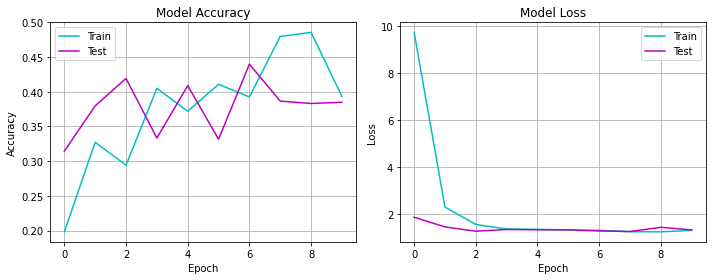

In [17]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='tanh')(output)
output = keras.layers.Dense(2500, activation='tanh')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input_data, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(model,history, train_data, validation_data)

### Effect of Optimizer
In this part we will test SGD with 0, 0.5, and 0.9 momentum parameter and Adam optimizer.

Momentum takes past gradients into account to smooth out the steps of gradient descent meaning that it accelerates gradient descent in the relevant direction and dampens oscillations.

As the momentum increases, the speed of our movement towards the answer increases in such a way that it becomes difficult to reach the answer meaning that if for example momentum is too high we'll overshoot the answer each time and never reach it. It's better to move slower as we get closer to the answer. Higher momentum will make the model almost random and also in each propagation the weights will change more rapidly which isn't what we want.

Adam is an optimization algorithm that can be used instead of the SGD. The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter.

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_13 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_14 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 2/43 [>............................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 67s 2s/step - loss: 2.3746 - accuracy: 0.2450 - val_loss: 1.3691 - val_accuracy: 0.3900
Epoch 2/10
43/43 [==============================] - 65s 2s/step - loss: 1.4376 - accuracy: 0.2458 - val_loss: 1.3127 - val_accuracy: 0.4656
Epoch 3/10
43/43 [==============================] - 65s 1s/step - loss: 1.3859 - accuracy: 0.3191 - val_loss: 1.3041 - val_accuracy: 0.4330
Epoch 4/10
43/43 [==============================] - 65s 2s/step - loss: 1.3291 - accuracy: 0.3602 - val_loss: 1.3780 - val_accuracy: 0.3368
Epoch 5/10
43/43 [==============================] - 65s 2s/step - loss: 1.3497 - accuracy: 0.3742 - val_loss: 1.2620 - val_accuracy: 0.4502
Epoch 6/10
43/43 [==============================] - 65s 2s/step - loss: 1.2893 - accuracy: 0.4197 - val_loss: 1.2158 - val_accuracy: 0.4639
Epoch 7/10
43/43 [==============================] - 65s 1s/step - loss: 1.2601 - accuracy: 0.3918 - val_loss: 1.1746 - val_accuracy: 0.5017
Epoch 8/10
43/43 [=============

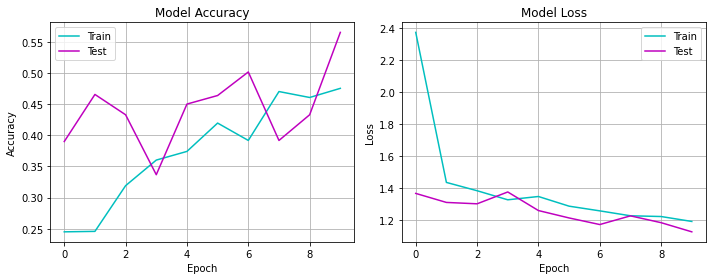

In [18]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

opt_model = keras.models.Model(inputs=input_data, outputs=output)
opt_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy'])
opt_model.summary()
history = opt_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(opt_model,history, train_data, validation_data)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_16 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_17 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 1/43 [.............................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 71s 2s/step - loss: 3.0531 - accuracy: 0.1277 - val_loss: 1.3818 - val_accuracy: 0.3024
Epoch 2/10
43/43 [==============================] - 66s 2s/step - loss: 1.6762 - accuracy: 0.2480 - val_loss: 1.5378 - val_accuracy: 0.2612
Epoch 3/10
43/43 [==============================] - 66s 2s/step - loss: 1.5430 - accuracy: 0.2282 - val_loss: 1.3610 - val_accuracy: 0.3024
Epoch 4/10
43/43 [==============================] - 67s 2s/step - loss: 1.5401 - accuracy: 0.2194 - val_loss: 1.3463 - val_accuracy: 0.3230
Epoch 5/10
43/43 [==============================] - 66s 2s/step - loss: 1.4916 - accuracy: 0.2333 - val_loss: 1.5517 - val_accuracy: 0.2560
Epoch 6/10
43/43 [==============================] - 66s 2s/step - loss: 1.4762 - accuracy: 0.2671 - val_loss: 1.3885 - val_accuracy: 0.2698
Epoch 7/10
43/43 [==============================] - 66s 2s/step - loss: 1.5935 - accuracy: 0.2605 - val_loss: 1.5020 - val_accuracy: 0.2749
Epoch 8/10
43/43 [=============

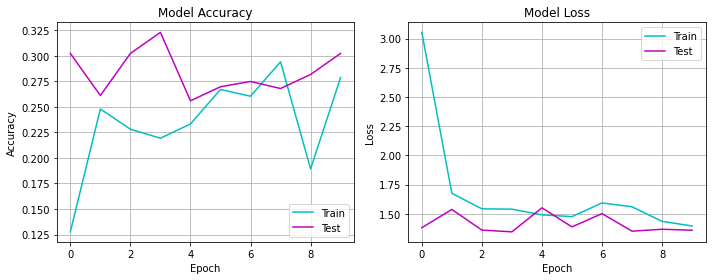

In [19]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

opt_model = keras.models.Model(inputs=input_data, outputs=output)
opt_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
opt_model.summary()
history = opt_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(opt_model,history, train_data, validation_data)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_18 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_19 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_20 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 5/43 [==>..........................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 71s 2s/step - loss: 13.9100 - accuracy: 0.2781 - val_loss: 1.4254 - val_accuracy: 0.2595
Epoch 2/10
43/43 [==============================] - 69s 2s/step - loss: 1.4496 - accuracy: 0.2003 - val_loss: 1.3842 - val_accuracy: 0.2732
Epoch 3/10
43/43 [==============================] - 68s 2s/step - loss: 1.3796 - accuracy: 0.1893 - val_loss: 1.3629 - val_accuracy: 0.2732
Epoch 4/10
43/43 [==============================] - 69s 2s/step - loss: 1.4443 - accuracy: 0.1952 - val_loss: 1.3799 - val_accuracy: 0.2646
Epoch 5/10
43/43 [==============================] - 69s 2s/step - loss: 1.3798 - accuracy: 0.2729 - val_loss: 1.3793 - val_accuracy: 0.2646
Epoch 6/10
43/43 [==============================] - 72s 2s/step - loss: 1.3783 - accuracy: 0.2685 - val_loss: 1.3774 - val_accuracy: 0.2698
Epoch 7/10
43/43 [==============================] - 69s 2s/step - loss: 1.3720 - accuracy: 0.2729 - val_loss: 1.3670 - val_accuracy: 0.2801
Epoch 8/10
43/43 [============

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


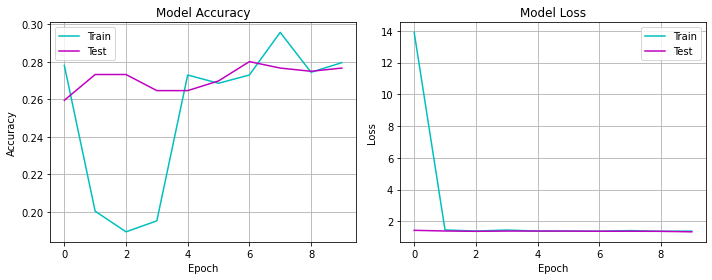

In [20]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

opt_model = keras.models.Model(inputs=input_data, outputs=output)
opt_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
opt_model.summary()
history = opt_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(opt_model,history, train_data, validation_data)

### Effect of Epoch
It's safe to say that in some special problems 1 epoch can be enough we will get good accuracy and everything but it's importent to note that gradient Descent is an iterative process so updating the weights with single pass or one epoch is not enough. One epoch leads to underfitting. As the number of epochs increases, more times the weights are changed in the neural network so the curve goes from underfitting to optimal to overfitting curve. So in total since updating the weights needs multiple number of passings(epochs) we'll have to train the model for multiple epochs.

After a lot of epochs the test accuracy starts to plummet but the train accuracy keeps on rising this is a clear sign of overfitting doing well on training set but doing horrible on test set. Even Loss value we can easily show overfitting, in the training set the loss keeps lowering but in test set loss value rises rapidly. So the best option is to train the model up until the very moment that overfitting starts by this approach we will prevent underfitting and also won't cause overfitting.

Increasing number of epochs by a lot will definitely result in overfitting so it won't be a good idea. To avoid the problem we have to hit the sweet spot meaning that we know really low number of epochs will result in underfitting and really high number of epochs will result in overfitting so the best possible way is to find where the underfitting stops and overfitting starts that is the best place since it neither has underfitting nor overfitting. That is the best possible epoch to achieve. But if we want to make our model better and overcome overfitting there all a lot of ways to do it and make the situation better like as we saw we can tune our hyperparameters, use different number of nodes in each hidden layer, use different number of hidden layers, study our data and know what approach to make based on the data, use other models and many more.


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_21 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_22 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_23 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 4/43 [=>...........................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 65s 2s/step - loss: 41.5590 - accuracy: 0.2333 - val_loss: 1.8217 - val_accuracy: 0.2337
Epoch 2/20
43/43 [==============================] - 63s 1s/step - loss: 1.5144 - accuracy: 0.2649 - val_loss: 1.3835 - val_accuracy: 0.2629
Epoch 3/20
43/43 [==============================] - 65s 2s/step - loss: 1.3900 - accuracy: 0.2817 - val_loss: 1.3661 - val_accuracy: 0.2852
Epoch 4/20
43/43 [==============================] - 64s 1s/step - loss: 1.3860 - accuracy: 0.2230 - val_loss: 1.3854 - val_accuracy: 0.2629
Epoch 5/20
43/43 [==============================] - 63s 1s/step - loss: 1.3798 - accuracy: 0.2671 - val_loss: 1.3840 - val_accuracy: 0.2629
Epoch 6/20
43/43 [==============================] - 63s 1s/step - loss: 1.3786 - accuracy: 0.2678 - val_loss: 1.3830 - val_accuracy: 0.2646
Epoch 7/20
43/43 [==============================] - 65s 2s/step - loss: 1.3775 - accuracy: 0.2685 - val_loss: 1.3829 - val_accuracy: 0.2629
Epoch 8/20
43/43 [============

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

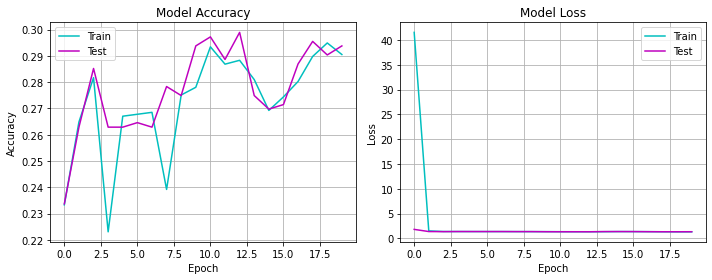

In [21]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

eopch_model = keras.models.Model(inputs=input_data, outputs=output)
eopch_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
eopch_model.summary()
history = eopch_model.fit(train_data, validation_data=validation_data, epochs=20)
model_fit_info(eopch_model,history, train_data, validation_data)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_8 (Flatten)         (None, 10000)             0         
                                                                 
 dense_24 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_25 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_26 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
13/43 [========>....................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 66s 2s/step - loss: 16.2819 - accuracy: 0.1409 - val_loss: 1.4212 - val_accuracy: 0.2354
Epoch 2/20
43/43 [==============================] - 63s 1s/step - loss: 1.4580 - accuracy: 0.2238 - val_loss: 1.4175 - val_accuracy: 0.2629
Epoch 3/20
43/43 [==============================] - 63s 1s/step - loss: 1.7101 - accuracy: 0.2685 - val_loss: 1.3883 - val_accuracy: 0.2715
Epoch 4/20
43/43 [==============================] - 66s 2s/step - loss: 1.3883 - accuracy: 0.2737 - val_loss: 1.3728 - val_accuracy: 0.2955
Epoch 5/20
43/43 [==============================] - 64s 1s/step - loss: 1.3773 - accuracy: 0.2113 - val_loss: 1.3615 - val_accuracy: 0.2715
Epoch 6/20
43/43 [==============================] - 64s 1s/step - loss: 1.3563 - accuracy: 0.2729 - val_loss: 1.3590 - val_accuracy: 0.2732
Epoch 7/20
43/43 [==============================] - 68s 2s/step - loss: 1.3655 - accuracy: 0.2517 - val_loss: 1.3801 - val_accuracy: 0.2698
Train:
              precision

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


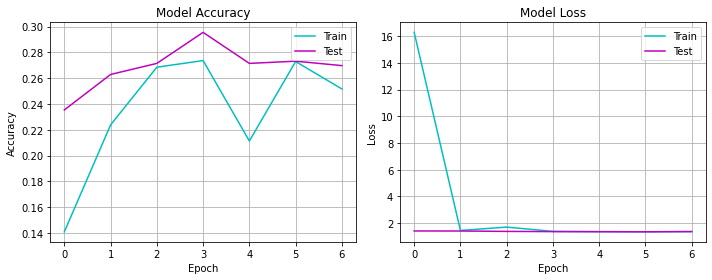

In [22]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

eopch_model = keras.models.Model(inputs=input_data, outputs=output)
eopch_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
es_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
eopch_model.summary()
history = eopch_model.fit(train_data, validation_data=validation_data, callbacks=[es_callback], epochs=20)
model_fit_info(eopch_model,history, train_data, validation_data)

### Effect of Loss Function
As shown above the loss value while using MSE is constant meaning that the weights aren't updated. This will result in the network predicting everything as one of classes which is horrible Categorical Crossentropy is much better for our situation.

The Mean Squared Error is used as a default metric for evaluation of the performance of most regression algorithms meaning that MSE loss function is mostly used in regressions, where we are predicting age of a person, price of a house and many more. Here our problem is a classification problem with 5 classes and it's certainly not a regression problem so MSE is not suitable here and Categorical Crossentropy is much more suitable.

Using MSE means that we assume that the underlying data has been generated from a normal distribution in reality, a dataset that can be classified into categories is not always from a normal distribution. Also if classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range (-inf, inf), while here classification models output probabilities in range (0,3). Also as said before MSE is a good choice for a Cost function when we are doing Linear Regression.

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_9 (Flatten)         (None, 10000)             0         
                                                                 
 dense_27 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_28 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_29 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
18/43 [===========>.................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 66s 2s/step - loss: 0.3746 - accuracy: 0.2377 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 2/10
43/43 [==============================] - 63s 1s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 3/10
43/43 [==============================] - 63s 1s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 4/10
43/43 [==============================] - 63s 1s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 5/10
43/43 [==============================] - 63s 1s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 6/10
43/43 [==============================] - 63s 1s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 7/10
43/43 [==============================] - 63s 1s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 8/10
43/43 [=============

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

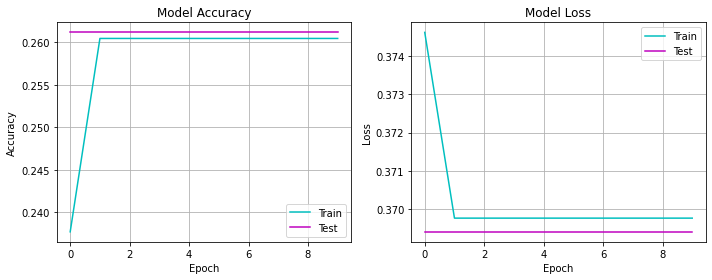

In [23]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

loss_model = keras.models.Model(inputs=input_data, outputs=output)
loss_model.compile(optimizer=keras.optimizers.Adam(), loss='MSE', metrics=['accuracy'])
loss_model.summary()
history = loss_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(loss_model,history, train_data, validation_data)

### Effect of Regularization
L2 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large weight values meaning that with L2 regularization we add a fraction of the sum of the squared weight values to the base error so on each training iteration, each weight is decayed toward zero by a small fraction of the weight's current value resulting in regularization and better results.

Dropout involves going over all the layers in a neural network and setting probability of keeping a certain nodes or not meaning that the neural network cannot rely on any input node, since each have a random probability of being removed. Therefore, the neural network will be reluctant to give high weights to certain features, because they might disappear so the weights are spread across all features, making them smaller. This effectively shrinks the model and regularizes it.

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_10 (Flatten)        (None, 10000)             0         
                                                                 
 dense_30 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_31 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_32 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 3/43 [=>..........................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 74s 2s/step - loss: 88.5274 - accuracy: 0.2612 - val_loss: 39.7756 - val_accuracy: 0.2337
Epoch 2/10
43/43 [==============================] - 71s 2s/step - loss: 32.9312 - accuracy: 0.1908 - val_loss: 24.9208 - val_accuracy: 0.2646
Epoch 3/10
43/43 [==============================] - 71s 2s/step - loss: 20.2540 - accuracy: 0.2267 - val_loss: 16.0145 - val_accuracy: 0.2337
Epoch 4/10
43/43 [==============================] - 70s 2s/step - loss: 13.4163 - accuracy: 0.2208 - val_loss: 11.0057 - val_accuracy: 0.2354
Epoch 5/10
43/43 [==============================] - 71s 2s/step - loss: 9.9523 - accuracy: 0.1438 - val_loss: 8.8124 - val_accuracy: 0.2337
Epoch 6/10
43/43 [==============================] - 71s 2s/step - loss: 7.7919 - accuracy: 0.2311 - val_loss: 6.7286 - val_accuracy: 0.2680
Epoch 7/10
43/43 [==============================] - 71s 2s/step - loss: 6.4215 - accuracy: 0.2905 - val_loss: 5.7154 - val_accuracy: 0.2577
Epoch 8/10
43/43 [=====

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

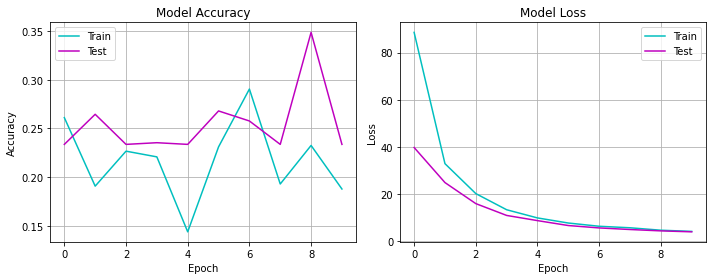

In [24]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu', kernel_regularizer='l2')(output)
output = keras.layers.Dense(2500, activation='relu', kernel_regularizer='l2')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

reg_model = keras.models.Model(inputs=input_data, outputs=output)
reg_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reg_model.summary()
history = reg_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(reg_model,history, train_data, validation_data)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_33 (Dense)            (None, 5000)              50005000  
                                                                 
 dropout (Dropout)           (None, 5000)              0         
                                                                 
 dense_34 (Dense)            (None, 2500)              12502500  
                                                                 
 dropout_1 (Dropout)         (None, 2500)              0         
                                                                 
 dense_35 (Dense)            (None, 4)                 100

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 73s 2s/step - loss: 21.6561 - accuracy: 0.1930 - val_loss: 1.6370 - val_accuracy: 0.2766
Epoch 2/10
43/43 [==============================] - 64s 1s/step - loss: 1.4889 - accuracy: 0.2252 - val_loss: 1.4272 - val_accuracy: 0.2680
Epoch 3/10
43/43 [==============================] - 63s 1s/step - loss: 1.5894 - accuracy: 0.2157 - val_loss: 1.4397 - val_accuracy: 0.2543
Epoch 4/10
43/43 [==============================] - 63s 1s/step - loss: 1.4390 - accuracy: 0.2583 - val_loss: 1.3533 - val_accuracy: 0.3299
Epoch 5/10
43/43 [==============================] - 63s 1s/step - loss: 1.4660 - accuracy: 0.2612 - val_loss: 1.3908 - val_accuracy: 0.3436
Epoch 6/10
43/43 [==============================] - 63s 1s/step - loss: 1.4526 - accuracy: 0.1731 - val_loss: 1.4120 - val_accuracy: 0.2612
Epoch 7/10
43/43 [==============================] - 63s 1s/step - loss: 1.3760 - accuracy: 0.2465 - val_loss: 1.3856 - val_accuracy: 0.2680
Epoch 8/10
43/43 [============

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


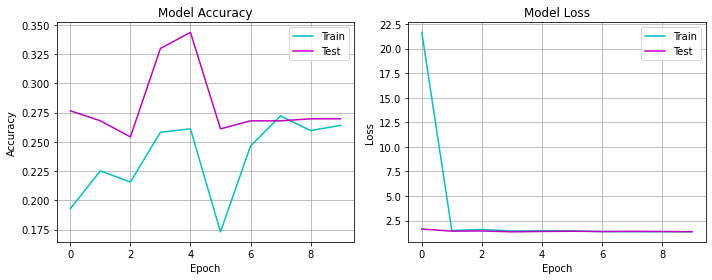

In [25]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(4, activation='softmax')(output)

reg_model = keras.models.Model(inputs=input_data, outputs=output)
reg_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reg_model.summary()
history = reg_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(reg_model,history, train_data, validation_data)

## Prediction

In [26]:
train_pred = main_model.predict(train_data)
test_pred = main_model.predict(test_data)

train_pred = numpy.argmax(numpy.array(train_pred), axis = 1)
test_pred = numpy.argmax(numpy.array(test_pred), axis = 1)

print("Train:")
print(classification_report(train_pred, numpy.array(train_data.classes)))
print("Test:")
print(classification_report(test_pred, numpy.array(test_data.classes)))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train:
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       577
           1       0.32      0.86      0.47       121
           2       0.28      0.97      0.43       101
           3       0.87      0.49      0.63       564

    accuracy                           0.52      1363
   macro avg       0.53      0.68      0.51      1363
weighted avg       0.68      0.52      0.55      1363

Test:
              precision    recall  f1-score   support

           0       0.61      0.35      0.44       385
           1       0.24      0.77      0.36        61
           2       0.15      0.80      0.26        41
           3       0.80      0.45      0.58       346

    accuracy                           0.45       833
   macro avg       0.45      0.59      0.41       833
weighted avg       0.64      0.45      0.48       833



------------------------- Correct Prediction ----------------------------------


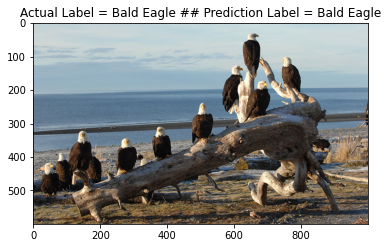

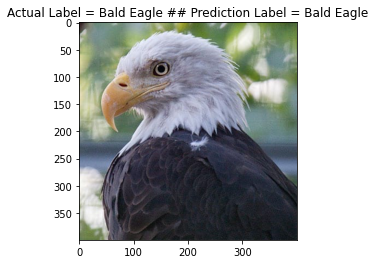

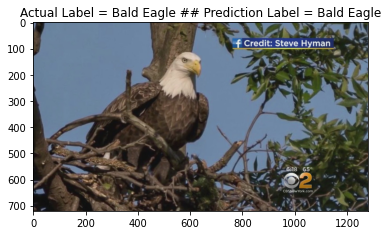

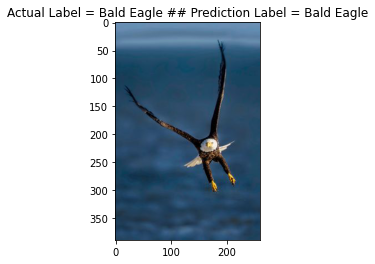

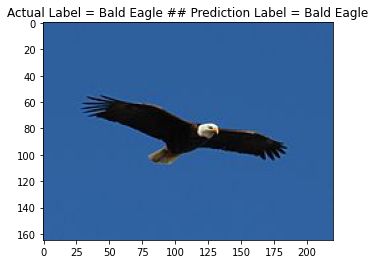

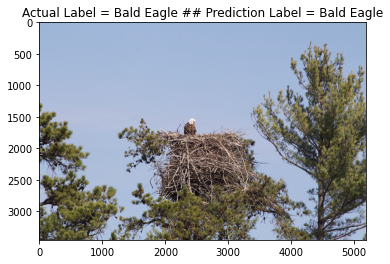

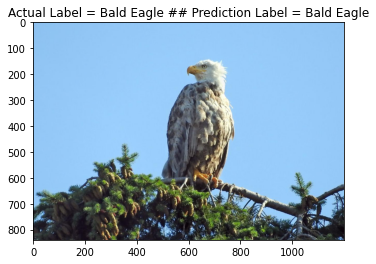

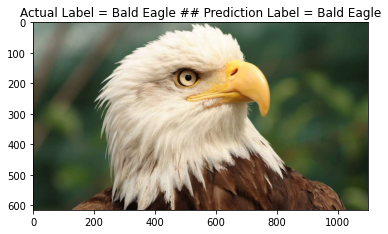

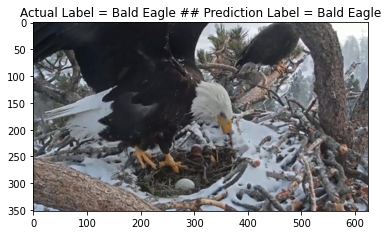

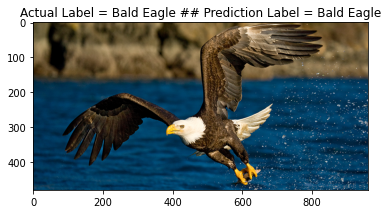

------------------------- Wrong Prediction ----------------------------------


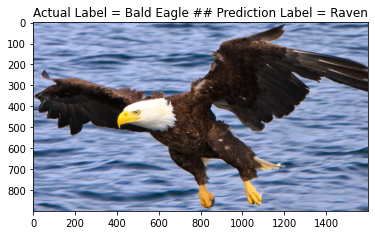

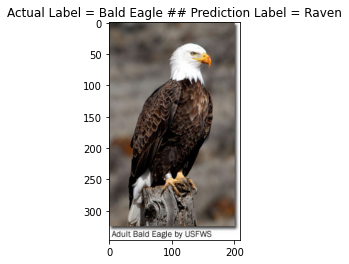

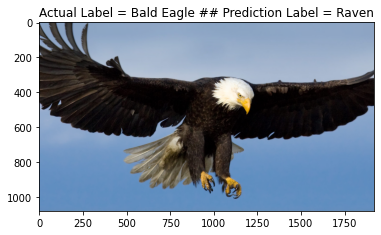

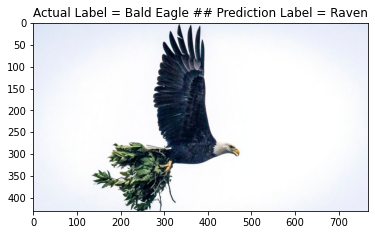

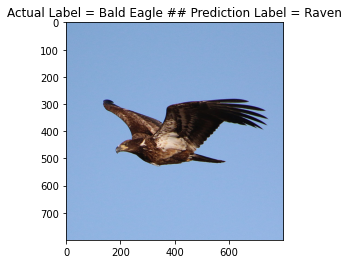

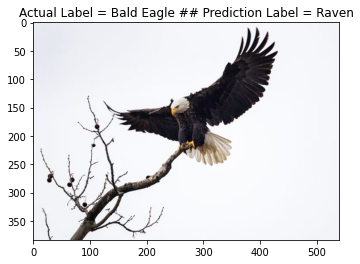

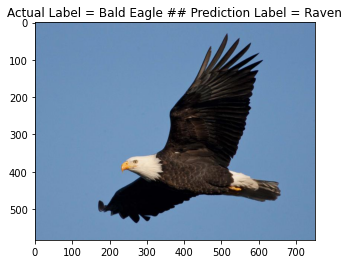

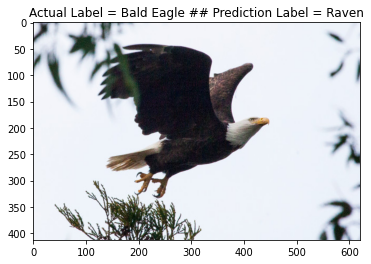

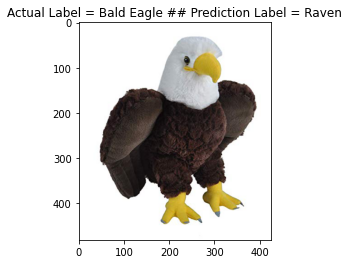

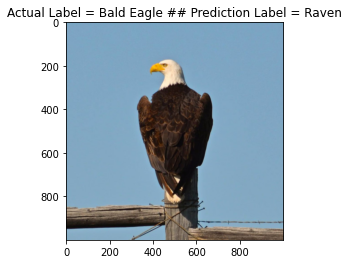

In [53]:
class_labels = {0: "Bald Eagle" , 1: "Elk" , 2: "Racoon" , 3: "Raven"}

i = -1
correct = []

for data, pred in zip(test_data.labels,test_pred):
  i += 1
  if data == pred:
    correct.append(i)
  if len(correct) == 10:
    break

print('------------------------- Correct Prediction ----------------------------------')

for image in correct:
  im = plot.imread('/content/dataset/test/'+test_data.filenames[image])
  plot.imshow(im)
  plot.title('Actual Label = '+class_labels[test_data.labels[image]]+' ## Prediction Label = '+class_labels[test_pred[image]])
  plot.show()

i = -1
wrong = []

for data, pred in zip(test_data.labels,test_pred):
  i += 1
  if data != pred:
    wrong.append(i)
  if len(wrong) == 10:
    break

print('------------------------- Wrong Prediction ----------------------------------')

for image in wrong:
  im = plot.imread('/content/dataset/test/'+test_data.filenames[image])
  plot.imshow(im)
  plot.title('Actual Label = '+class_labels[test_data.labels[image]]+' ## Prediction Label = '+class_labels[test_pred[image]])
  plot.show()
